<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/ANN_%20better_resolution/Fig_05_BIG_Segmentation_ann_new_maio_21_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 2.1MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 311, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 311 (delta 24), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (311/311), 128.77 MiB | 22.72 MiB/s, done.
Resolving deltas: 100% (141/141), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]  #  numbers 4, 13 and 25 (change to the correct one: this is wrong to PSD)
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 120 (delta 55), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (120/120), 124.74 MiB | 20.35 MiB/s, done.
Resolving deltas: 100% (55/55), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
# from segment_filter_not_conclude import Segmenta  # got image provided segmented
from segment_filter_not_conclude_parte_03 import Segmenta  

In [9]:
c =10 # size to segment
d = 1000  # size to segment

In [10]:
df=Segmenta(img,c,d)
df = df.dropna()

In [11]:
print(df)

    Width           0           1  ...       9997       9998       9999
0      14   52.000000   52.000000  ...  46.000000  46.000000  46.000000
1     552   69.569000   82.267647  ...   1.192344   0.950746   0.654747
2     601  153.746872  120.890579  ...   4.744452   4.660565   5.158903
3     181   54.552486   53.410210  ...  88.393608  89.341202  90.258270
4     938   65.449631   67.814354  ...   2.997854   1.844518   0.864244
5     648    0.939986    1.036199  ...  39.130772   7.294354   0.832343
6     164   92.133850   91.836411  ...  17.269484  16.603212  15.384295
7     974   64.876312   55.204197  ...   4.683922   4.524019   4.066801
8     725  105.919144  104.801430  ...   5.869204   7.580262   0.871581
9     102   85.019218   86.059593  ...  22.645905  22.628220  22.646673
10    156    1.000000    1.000000  ...   0.000000   0.000000   0.000000
11     84    3.000000    3.000000  ...  54.000000  53.809525  53.000000
12    700   80.653061   85.836731  ...   0.000000   0.000000   0

In [12]:

Arq = "output_01.xlsx" # change the name in each new file
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
'''
cont = 0; num =25
img_graos = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img,c,d)
  del df['Width']
  result = np.array(df)/255
  prediction = model.predict(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)
'''

"\ncont = 0; num =25\nimg_graos = []\nimg=ww[0] \nwhile( cont < num):\n  df=Segmenta(img,c,d)\n  del df['Width']\n  result = np.array(df)/255\n  prediction = model.predict(result)\n  loc_grao =[];k=0\n  for i in prediction:\n    if( i == 0):\n      img_graos.append(df.iloc[k,:])\n      cont = cont + 1\n    k = k +1\nimg_graos = pd.DataFrame(img_graos)\nprint(img_graos)\n"

In [14]:
 num =25 #
 File_name = 'fotos_01.xlxs' # alterar para salvar os proximos

In [15]:
k = 0; cont = 0;
img_graos = []
img = ww[0] 
while( cont < num):
  df=Segmenta(img,c,d)
  print('k=',k)
  del df['Width']
  img_graos.append(df.iloc[k,:])
  cont = cont + 1
  k = k +1
img_graos = pd.DataFrame(img_graos)
# print(img_graos)
''''''

k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24


''

In [16]:
#np.sum(np.array(img_graos.iloc[[1],:]))/(28*28)

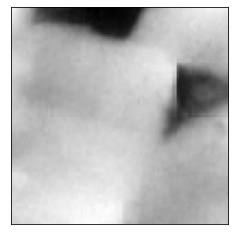

In [17]:
Size = 100
data=np.array(img_graos.iloc[[2],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(Size,Size)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

In [18]:
img_graos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,78.000000,78.000000,75.666672,75.000000,73.888885,73.000000,71.333328,68.000000,67.333336,62.000000,62.000000,60.222221,60.000000,60.666664,61.000000,58.777779,56.000000,55.555557,54.000000,54.000000,56.000000,56.000000,56.777779,57.000000,55.888889,55.000000,55.333332,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,57.333336,58.000000,57.555557,57.000000,57.444447,59.000000,59.000000,...,115.000000,117.000000,117.000000,117.000000,118.111115,119.000000,118.666664,118.000000,118.000008,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,117.555557,117.000000,116.777779,116.000000,116.000000,114.000000,114.000000,110.888885,110.000000,108.888885,108.000000,107.333328,106.000000,105.777779,104.000000,104.000000,104.000000,104.000000,102.666664,102.000000,103.777779,106.000000,105.555557,104.000000,104.000000
1,50.529877,57.127766,62.078579,64.776688,65.902145,65.941696,67.060349,68.760788,69.361855,70.837723,70.744720,71.235779,69.794655,70.995247,69.112595,67.497368,61.497837,55.823753,49.674526,37.276096,26.470013,26.238611,25.341837,23.428015,28.402063,59.401047,77.605637,85.648666,91.971901,95.681000,98.592712,105.203278,106.913498,106.851364,108.631798,110.539291,114.497131,115.049149,121.752518,128.038635,...,72.304153,73.499260,73.567924,72.352615,70.498634,71.227333,73.752991,74.597206,77.237221,76.983345,80.485535,81.833801,81.194221,79.911026,77.363319,77.594238,78.111221,79.799812,80.601395,81.375038,81.834335,84.539810,84.702194,83.010597,78.288574,70.225594,51.388588,30.573589,31.776285,31.672970,30.970810,27.041637,22.673849,15.680918,8.773744,5.066557,2.647882,1.557874,0.697194,0.675998
2,98.000000,96.272720,93.090912,89.045456,85.636360,82.727272,79.636360,77.636360,70.000000,63.636364,56.045456,48.909088,40.500000,33.181816,29.318182,26.727272,24.000000,24.954546,21.727272,21.000000,21.545454,22.000000,22.000000,21.863636,21.000000,21.000000,18.136364,16.545454,14.227273,13.000000,13.954545,15.272727,12.045454,13.000000,8.454545,8.772727,9.000000,9.000000,9.000000,9.227272,...,67.772728,66.727272,66.500000,67.363640,67.318176,65.272728,68.000000,68.954544,69.000000,68.318184,68.000000,68.000000,67.727280,66.863632,66.000000,66.000000,68.863632,69.000000,69.590912,70.000000,70.318176,71.181816,72.045456,73.000000,73.000000,73.772728,74.636368,75.500000,75.272728,74.681816,77.181816,79.000000,79.000000,78.181816,78.681816,80.090912,82.227280,83.454552,81.727272,80.000000
3,93.000000,93.000000,93.000000,93.000000,92.347824,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,93.913048,94.000000,94.000000,94.000000,92.782608,92.000000,92.000000,92.000000,91.739128,91.000000,91.000000,91.000000,91.000000,92.826088,93.000000,93.000000,93.000000,91.869568,91.000000,91.000000,91.000000,91.434784,93.000000,93.000000,93.000000,93.000000,93.000000,...,92.260872,94.000000,94.000000,94.000000,94.000000,92.434784,92.000000,92.000000,92.000000,93.739128,96.000000,96.000000,96.000000,96.086960,97.000000,97.000000,97.000000,97.000000,97.739136,98.000000,98.000000,98.000000,98.391304,99.000000,99.000000,99.000000,99.086960,101.000000,101.000000,101.000000,101.000000,102.391304,103.000000,103.000000,103.000000,102.304352,101.000000,101.000000,101.000000,101.000000
4,101.453712,104.394295,108.081512,113.837494,120.836967,122.351685,114.278236,85.368690,86.823997,94.825485,106.642464,96.415451,88.124245,88.977890,90.494629,93.094902,94.039856,92.799339,92.356674,91.338715,90.471886,88.143051,80.947708,67.622383,65.731850,71.806252,78.457108,79.900200,78.634705,78.425125,83.501320,93.666489,102.610367,107.444046,109.371452,111.714958,114.016251,117.812622,119.883720,124.

In [19]:
np.sum(np.array(img_graos.iloc[[3],:]))/(28*28)

1195.0976031848363

In [20]:
img_graos.iloc[[3],:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
3,93.0,93.0,93.0,93.0,92.347824,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,93.913048,94.0,94.0,94.0,92.782608,92.0,92.0,92.0,91.739128,91.0,91.0,91.0,91.0,92.826088,93.0,93.0,93.0,91.869568,91.0,91.0,91.0,91.434784,93.0,93.0,93.0,93.0,93.0,...,92.260872,94.0,94.0,94.0,94.0,92.434784,92.0,92.0,92.0,93.739128,96.0,96.0,96.0,96.08696,97.0,97.0,97.0,97.0,97.739136,98.0,98.0,98.0,98.391304,99.0,99.0,99.0,99.08696,101.0,101.0,101.0,101.0,102.391304,103.0,103.0,103.0,102.304352,101.0,101.0,101.0,101.0


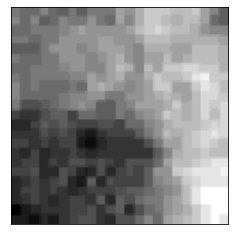

In [21]:
data=np.array(img_graos.iloc[[3],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(Size,Size)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

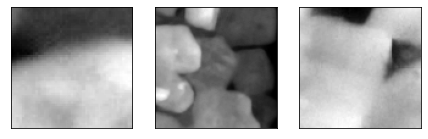

In [22]:
Num = 3
Size=100
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(img_graos.iloc[i,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(Size,Size)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)

In [23]:
print(np.random.rand(1,3))

[[0.91682377 0.17107123 0.775579  ]]
